## Testing notebook for SpchFig

22/02/08: v0.6  
27/09/22: v0.7   
Last verification: v0.8.2, python3.10 on win11   
10/01/2025: v0.8.3  

### Do the imports and get your data ready

In [1]:
#!pip install git+https://github.com/compi1234/pyspch.git
try:
    import pyspch
except ModuleNotFoundError:
    try:
        print(
        """
        To enable this notebook on platforms as Google Colab, 
        install the pyspch package and dependencies by running following code:

        !pip install git+https://github.com/compi1234/pyspch.git
        """
        )
    except ModuleNotFoundError:
        raise

In [2]:
%matplotlib inline
import os,sys 
import numpy as np
import pandas as pd
from IPython.display import display, Audio, HTML, clear_output

# optionally plotly as backend
# !! the plotly backend does not work at this point (22/09/2021)
#import plotly.io as pio
#os.environ['PYSPCH_BACKEND'] = "plotly"

#import matplotlib.pyplot as plt
#import matplotlib.gridspec as gridspec 
#from matplotlib.figure import Figure 
#
import pyspch.sp as Sps
import pyspch.core as Spch
import pyspch.display as Spd
# load example file and compute spectrogram
name='https://homes.esat.kuleuven.be/~spchlab/data/misc/friendly'
wavdata, sr = Spch.load(name+".wav")
seggra = Spch.read_seg_file(name+ ".gra",fmt='float32')
shift=0.01
spgfreq = Sps.spectrogram(wavdata,sample_rate=sr,f_shift=shift)
(nparam,nfr)=spgfreq.shape
d_freq = sr/(2.*(nparam-1))

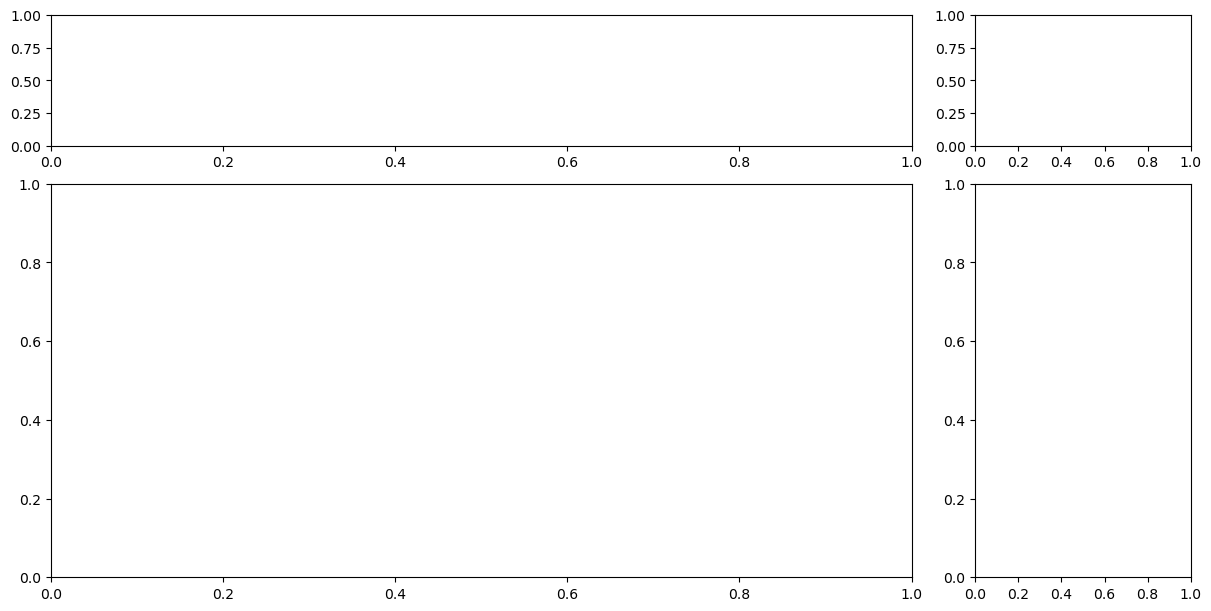

In [3]:
fig = Spd.SpchFig(row_heights=[1.,3.],col_widths=[4.,1.])
display(fig)

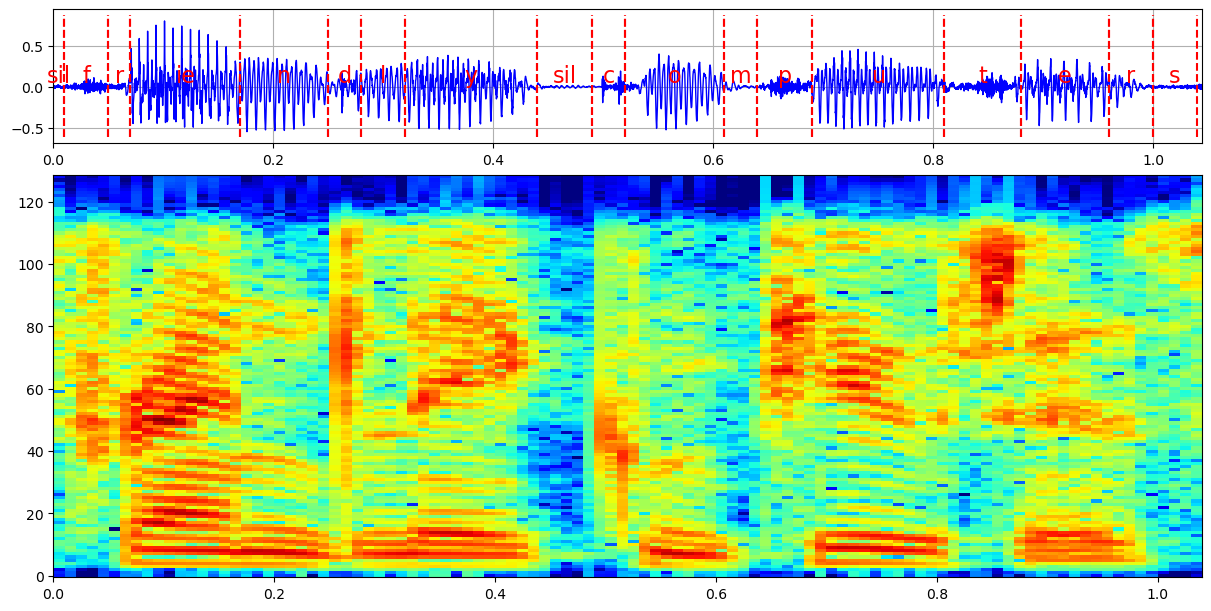

In [4]:
# remark that in this plot wavdata and spgfreq are NOT perfectly aligned
# this is because full wavdata (1.04435 sec) is plotted which is 
# longer than the aligned frames (1.04 sec)
fig=Spd.SpchFig(row_heights=[1,3])
fig.add_line_plot(wavdata,iax=0,dx=1/sr)
fig.add_img_plot(spgfreq,iax=1,dx=.01,x0=0.005)
fig.add_seg_plot(seggra,iax=0)
fig

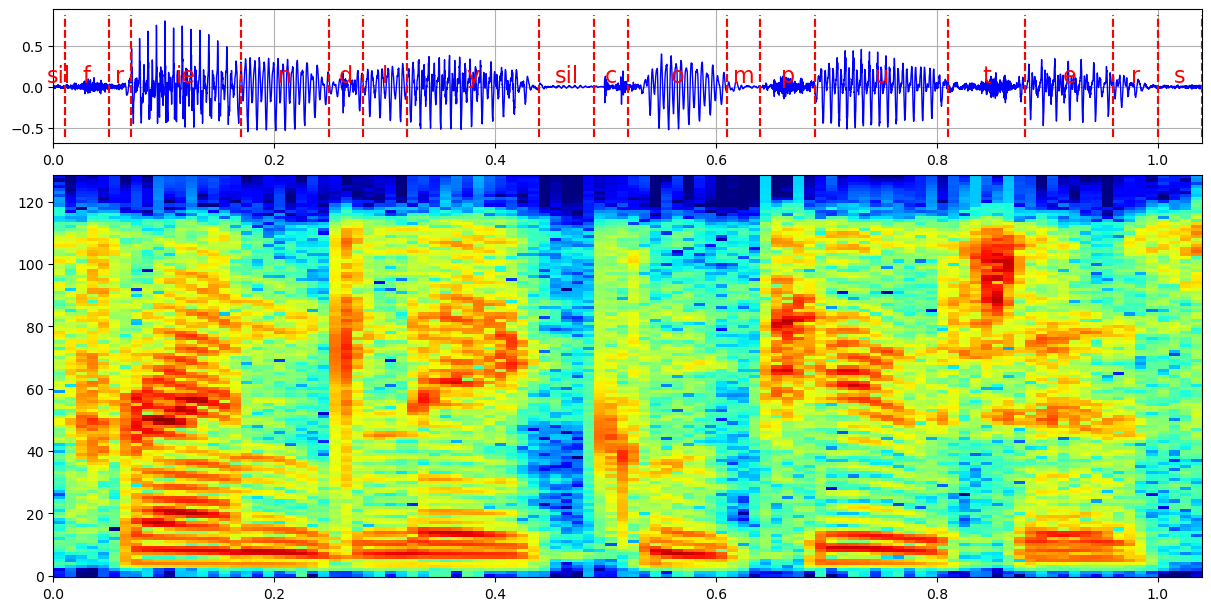

In [5]:
# set waveform axes limits to the spectrogram axis limits for seemingly perfect alignment
# but again this is not perfect 
fig.axes[0].set_xlim( fig.axes[1].get_xlim() )
fig

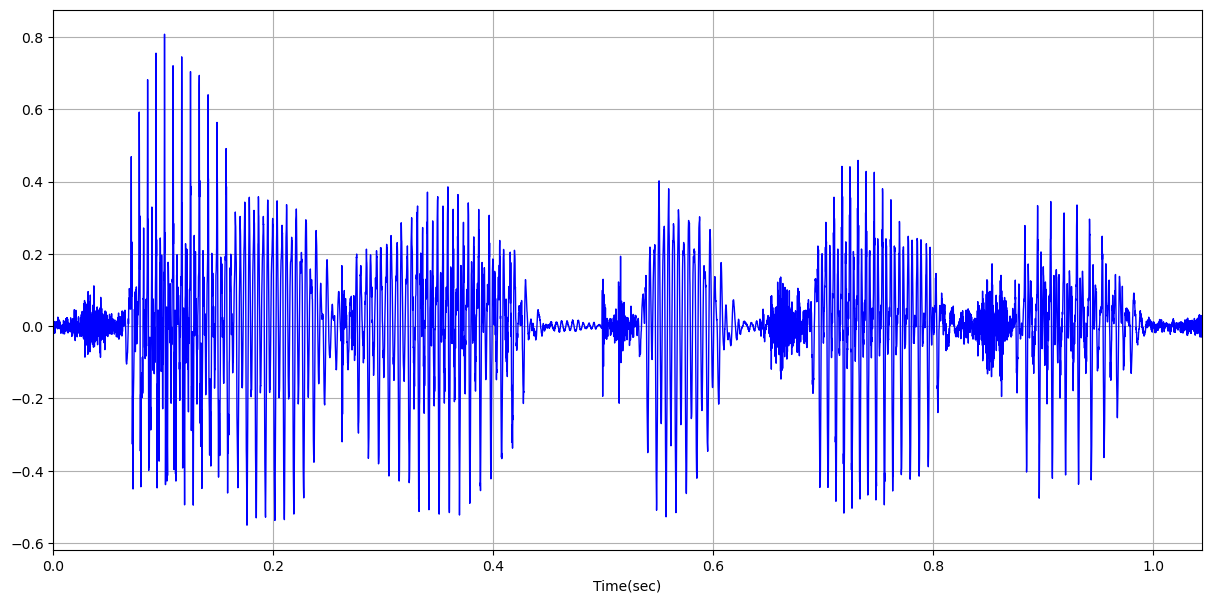

In [6]:
fig = Spd.PlotWaveform(wavdata)
fig

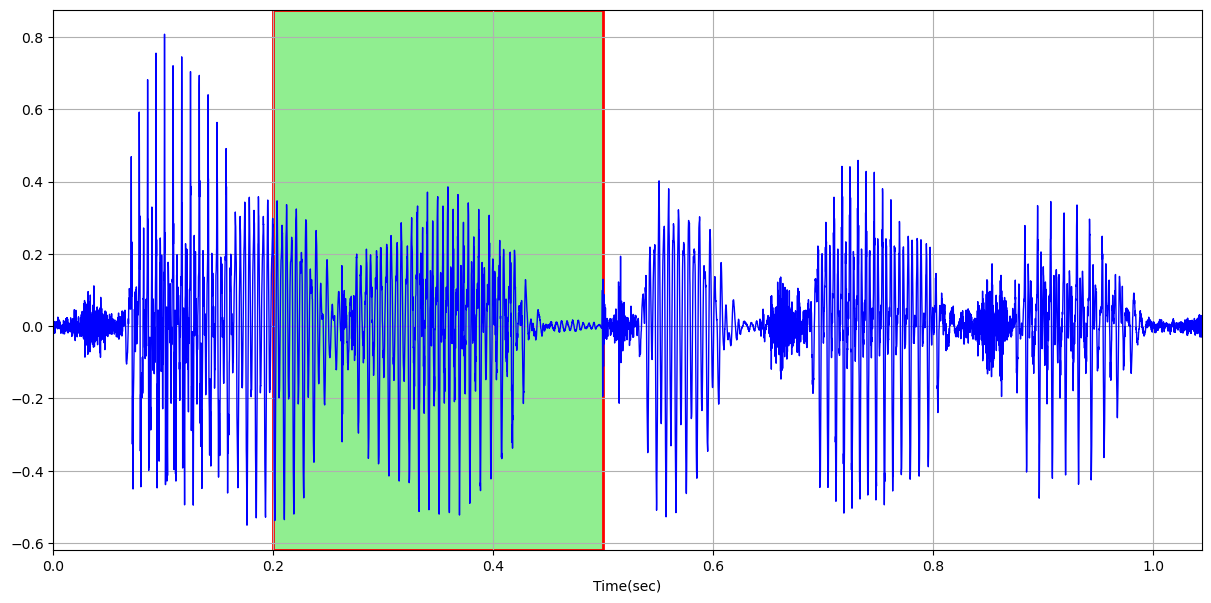

In [7]:
fig.add_vrect(.2,.5,ec='red',color='lightgreen',fill=True)
fig

### 1. Spectrogram 

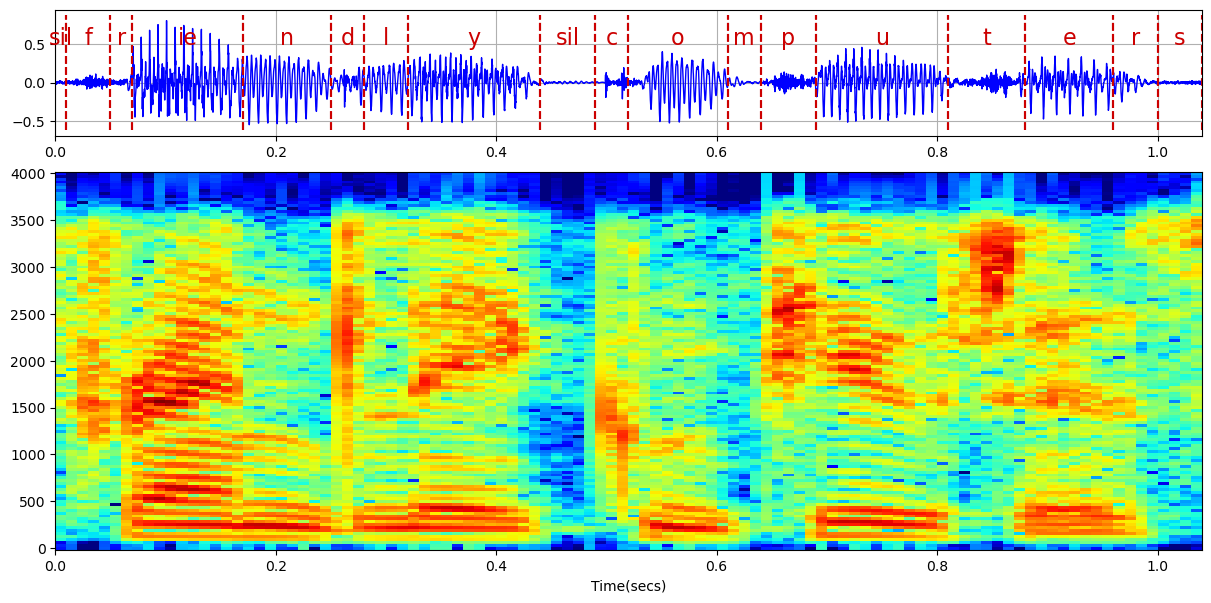

In [8]:
fig = Spd.PlotSpg(spgdata=spgfreq,wavdata=wavdata,sample_rate=sr,shift=shift,segwav=seggra)
fig

In [9]:
fig.axes[0].get_xlim()

(0.0, 1.04)

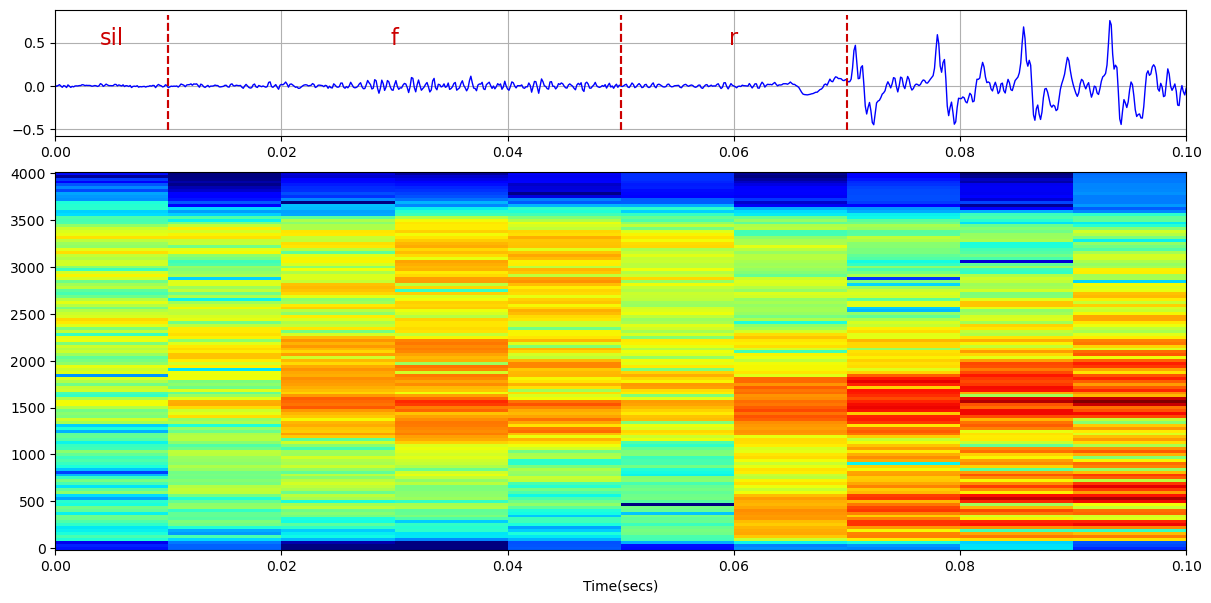

In [10]:
fig = Spd.PlotSpg(spgdata=spgfreq,wavdata=wavdata,frames=[0,10],sample_rate=sr,shift=shift,segwav=seggra)
fig

In [11]:
fig.axes[0].get_xlim()[1], fig.axes[1].get_xlim()

(0.1, (0.0, 0.1))

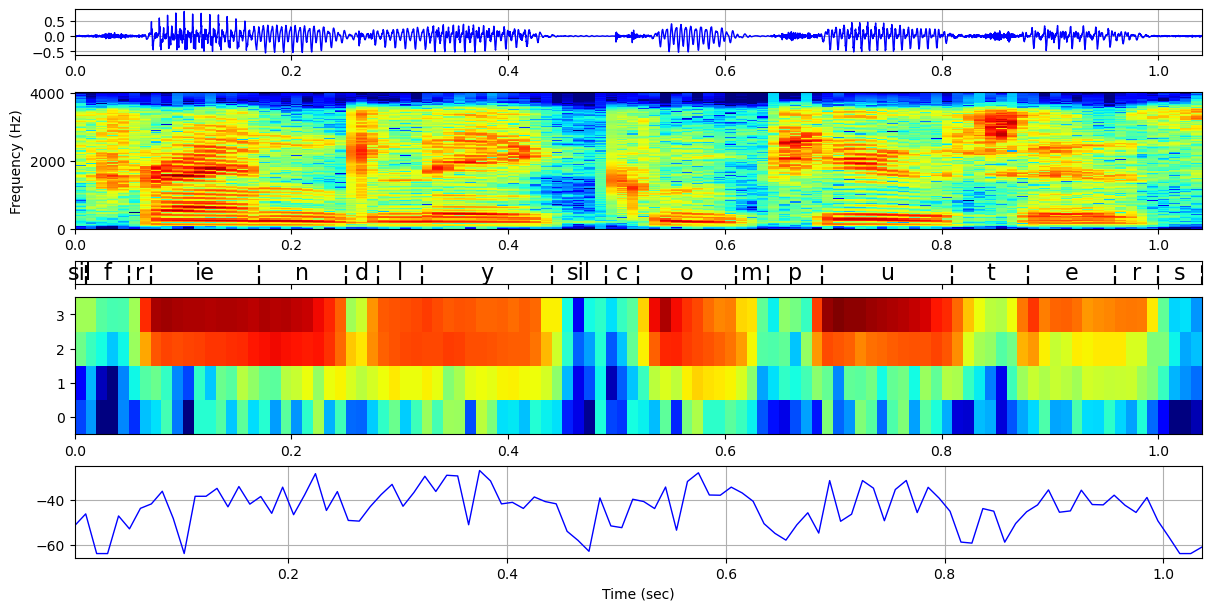

In [12]:
# the correct labeling (mid pixel on yaxis on ftrs[2]) will only be correct for matplotlib >=3.4
fig = Spd.PlotSpgFtrs(spgdata=spgfreq,wavdata=wavdata,sample_rate=sr,shift=shift,
                        segdata=[seggra],line_ftrs=[spgfreq[1,:]],img_ftrs=[spgfreq[1:5,:]])
fig

In [13]:
for i in [ 0,1,2,3]: print(fig.axes[i].get_xlim()) 

(0.0, 1.04)
(0.0, 1.04)
(0.0, 1.04)
(0.0, 1.04)


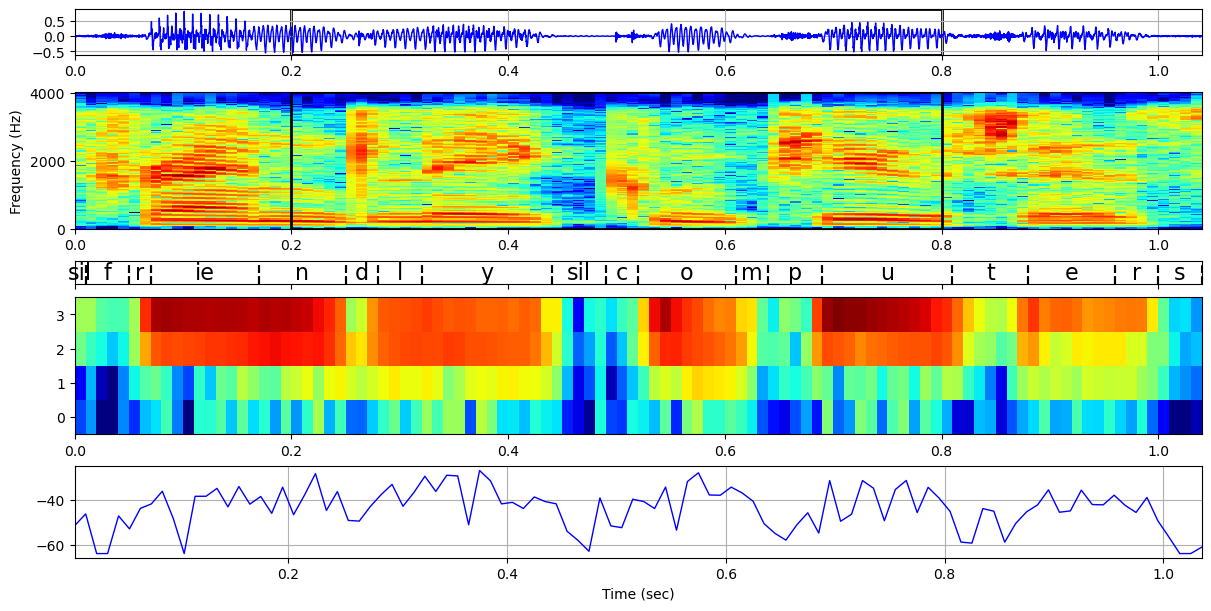

In [14]:
fig.add_vrect(.2,.8,iax=[1,0],color='r')
fig

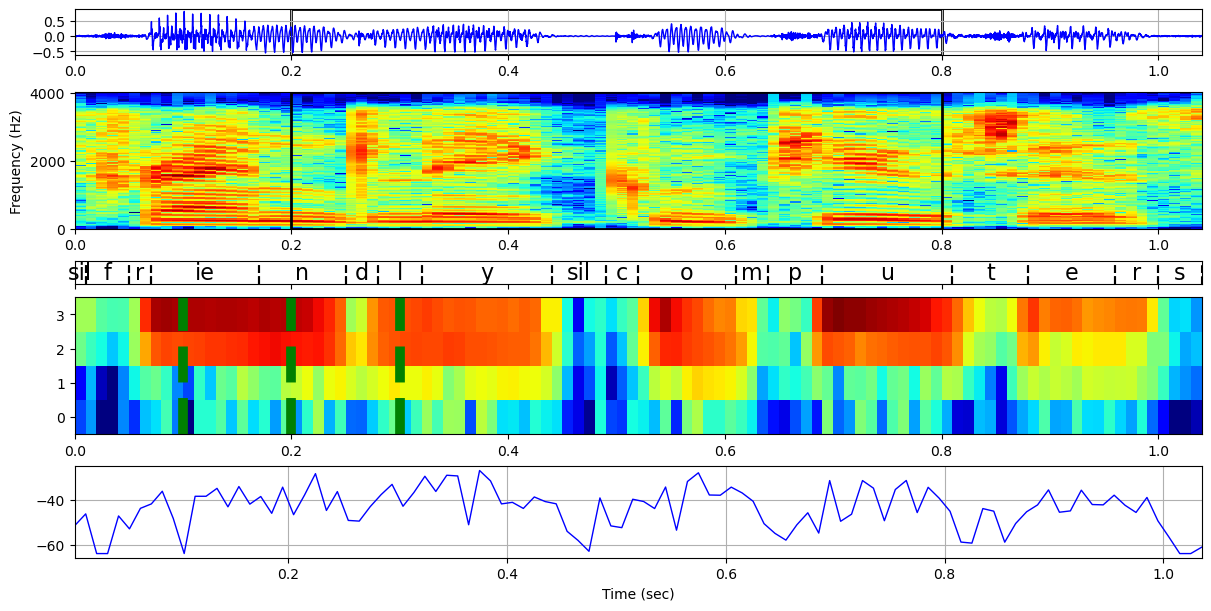

In [15]:
fig.add_vlines([.1,.2,.3],color='green',lw=7,iax=3)
display(fig)

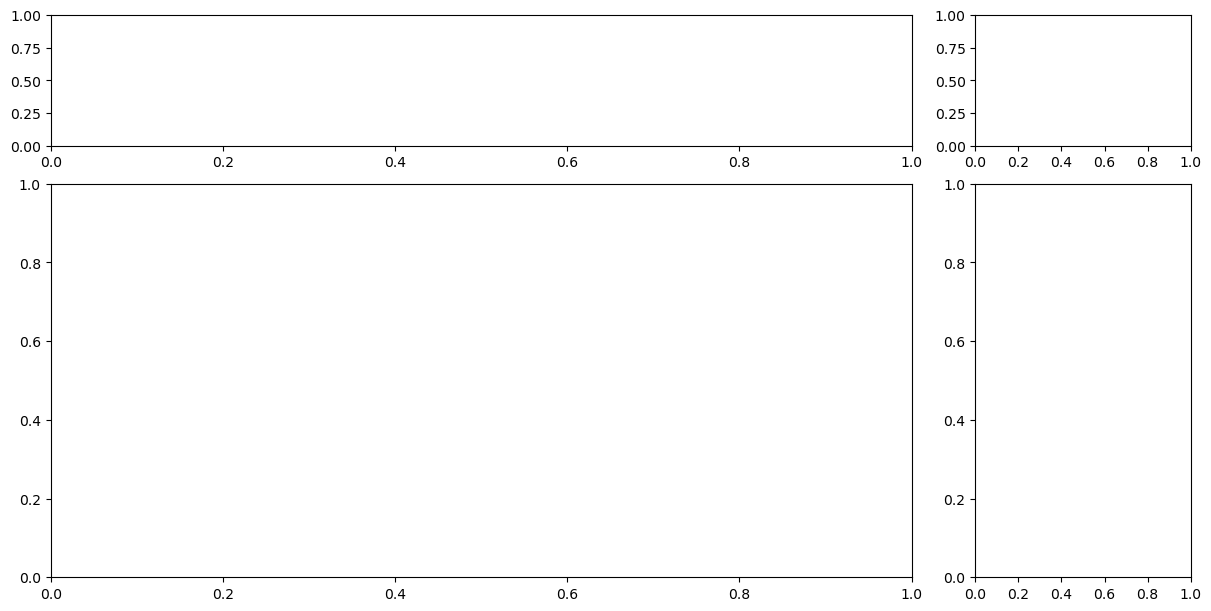

In [16]:
fig = Spd.SpchFig(row_heights=[1.,3.],col_widths=[4.,1.])
display(fig)

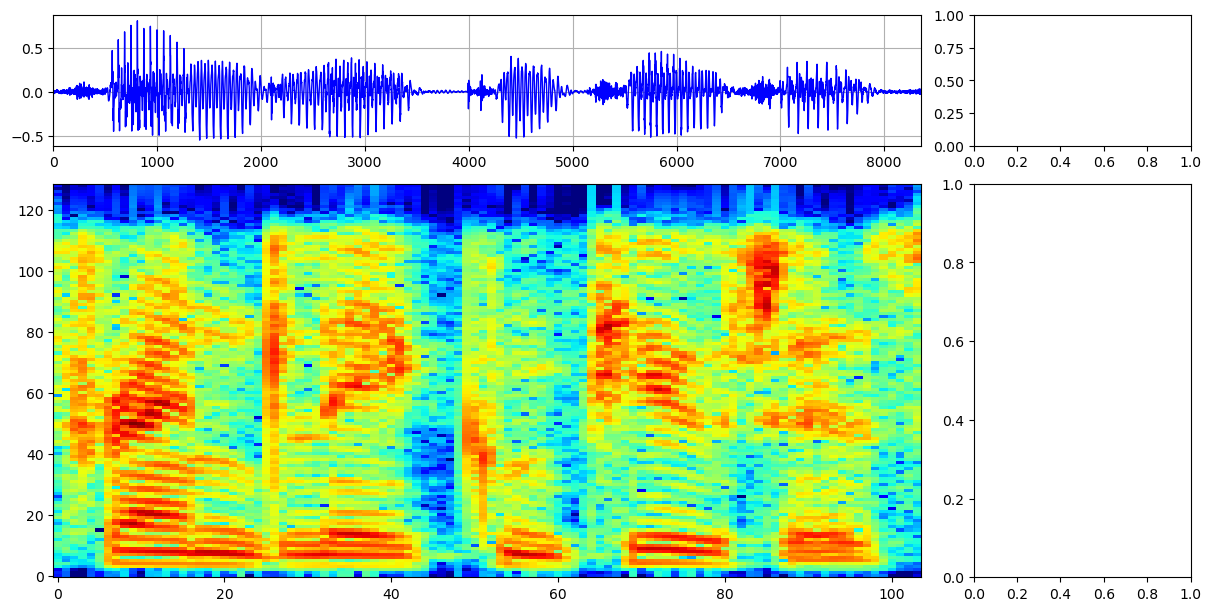

In [17]:
fig.add_line_plot(wavdata,iax=[0,0])
fig.add_img_plot(spgfreq,iax=[1,0])
fig

In [18]:
fig.axes[0].get_gridspec().ncols

2

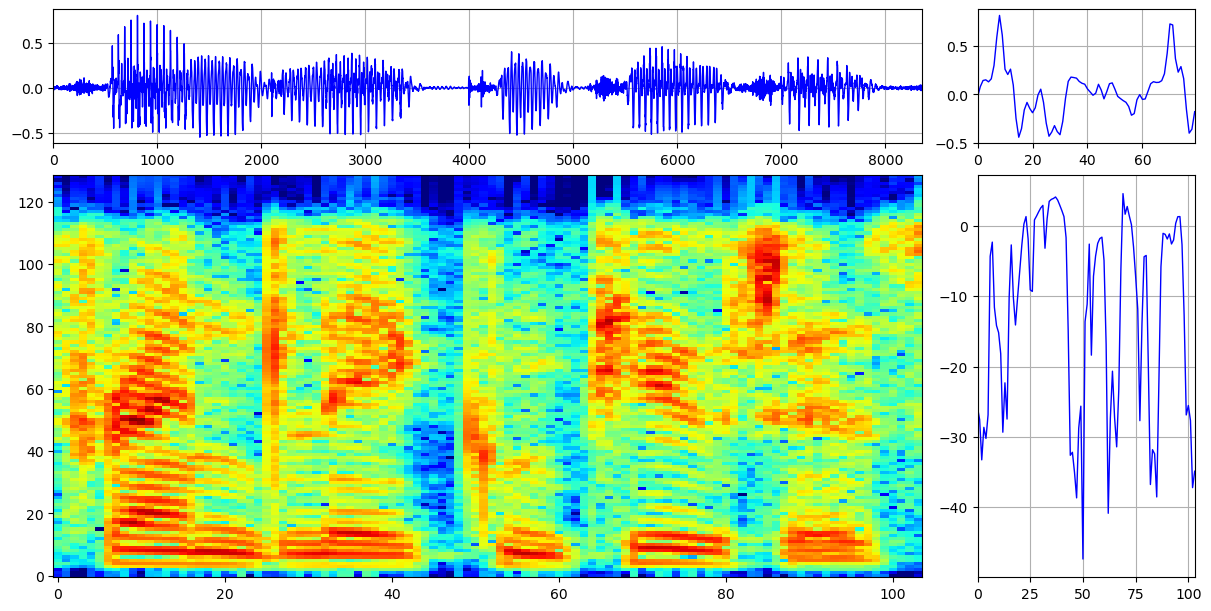

In [19]:
fig.add_line_plot(wavdata[800:880],iax=[0,1])
fig.add_line_plot(spgfreq[10,:],iax=[1,1])
fig